Actual model performance on the data happens much further down

 -Where elite_predit is called

In [2]:
import pandas as pd
import numpy as np

In [3]:
#grab training data
data_playoffs = pd.read_excel("./teams_cluster_min_playoffs.xlsx",index_col = "TEAM")

In [4]:
# data_playoffs

,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,PLAYOFF
TEAM,,,,,,,,,,,
_2000_ATL,0.000000,0.195649,0.248807,0.055570,0.142593,0.000000,0.128996,0.153215,0.000000,0.067012,0
_2000_BOS,0.262787,0.097828,0.000000,0.167292,0.152425,0.021616,0.043536,0.000000,0.000000,0.238786,0
_2000_CHH,0.268389,0.101087,0.000000,0.065733,0.151461,0.134026,0.000000,0.236030,0.039797,0.000000,1
_2000_CHI,0.000000,0.068864,0.339989,0.100647,0.152651,0.059950,0.135996,0.000000,0.000000,0.132939,0
_2000_CLE,0.000000,0.190408,0.226329,0.173879,0.123008,0.000000,0.000000,0.000000,0.101446,0.143287,0
...,...,...,...,...,...,...,...,...,...,...,...
_2022_SAC,0.000000,0.047848,0.222339,0.077938,0.101695,0.111122,0.000000,0.051133,0.257665,0.112645,0
_2022_SAS,0.127844,0.062031,0.000000,0.027125,0.000000,0.125196,0.000000,0.106446,0.473551,0.052142,0
_2022_TOR,0.242821,0.040711,0.000000,0.130854,0.126084,0.156003,0.000000,0.081422,0.201195,0.000000,1


In [58]:
# ! pip install tensorflow 

In [59]:
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

from keras.layers import Dense
from keras.models import Sequential

import random


from sklearn.metrics import roc_curve, auc

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [60]:
data_arr = data_playoffs.to_numpy()

In [61]:
#split data from labels
data_inputx = data_arr[:,0:10]
data_inputy = data_arr[:,10:11]

In [247]:
#split the data into diff sections based on input number
def split(run_num):
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=0.20, random_state=run_num)
    return x_train, x_test, y_train, y_test

In [241]:
#make MLP models given all input values and record testing and training accuracy
def scipy_nn(x_train, x_test, y_train, y_test, type_model, hidden, learn_rate, run_num):
    if type_model ==0: #SGD
        nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=10000,solver='sgd',  learning_rate_init=learn_rate )    
    elif type_model ==1: #Adam
        nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=run_num, max_iter=10000,solver='adam', learning_rate_init=learn_rate)
    nn.fit(x_train, y_train)
    y_pred_test = nn.predict(x_test)
    y_pred_train = nn.predict(x_train)
    acc_test = accuracy_score(y_pred_test, y_test) 
    acc_train = accuracy_score(y_pred_train, y_train)
    return (acc_test , acc_train)

In [212]:
#separate training and testing accuracy from touple
def separate(data):
    test = []
    train = []
    for _x in data:
        test.append(_x[0])
        train.append(_x[1])

    return (test,train)

In [213]:
#setting up data storage for performance models
max_expruns = 15
SGD_all = np.zeros((max_expruns,2)) 
SGD1_all = np.zeros((max_expruns,2)) 
Adam_all = np.zeros((max_expruns,2))
Adam1_all = np.zeros((max_expruns,2))

In [343]:
#parameters for the NN
#default and modified
hidden = 5
learn_rate = 0.01
hidden1 = 30
learn_rate1 = 0.005

In [344]:
#run the first models max_expruns times and record results
#this runs two original and two modified of same library
for run_num in range(0,max_expruns):
    x_train, x_test, y_train, y_test = split(run_num)
    acc_sgd = scipy_nn(x_train, x_test, y_train, y_test, 0, hidden, learn_rate, run_num) #SGD
    acc_sgd1 = scipy_nn(x_train, x_test, y_train, y_test, 0, hidden1, learn_rate1, run_num) #SGD mod
    acc_adam = scipy_nn(x_train, x_test, y_train, y_test, 1, hidden, learn_rate, run_num) #Adam        
    acc_adam1 = scipy_nn(x_train, x_test, y_train, y_test, 1, hidden1, learn_rate1, run_num) #Adam  mod      
    SGD_all[run_num] = acc_sgd
    SGD1_all[run_num] = acc_sgd1
    Adam_all[run_num] = acc_adam  
    Adam1_all[run_num] = acc_adam1

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was 

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [345]:
#record the test and training scores from data
sgd_test, sgd_train = separate(SGD_all)
sgd1_test, sgd1_train = separate(SGD1_all)
adam_test, adam_train = separate(Adam_all)
adam1_test, adam1_train = separate(Adam1_all)

In [310]:
#not used. will stop the model from overfitting
from keras.callbacks import EarlyStopping
usualCallback = EarlyStopping()
overfitCallback = EarlyStopping(monitor='val_acc', min_delta=1e-4, patience=10, start_from_epoch=0)

In [346]:
#using keras library for the NN
#change input dimension based on # of clusters
#performs max_expruns runs on the same models recoring test and training accuracy
sgd_keras = []
adam_keras = []
for run_num in range(0,max_expruns):
    x_train1, x_test1, y_train1, y_test1 = split(run_num)
    #sgd
    model = keras.Sequential()
    model.add(keras.layers.Dense(hidden1, input_dim=10, activation='relu'))
#     model.add(keras.layers.Dense(hidden1, input_dim=10, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    sgd = keras.optimizers.SGD(learning_rate=learn_rate1)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])
    model.fit(x_train1, y_train1, epochs=25, batch_size=150, verbose=0)#, callbacks=[overfitCallback])
    sgd_keras.append((model.evaluate(x_test1,y_test1)[1]))
    
    
    #adam
    model1 = keras.Sequential()
    model1.add(keras.layers.Dense(hidden1, input_dim=10, activation='relu'))
#     model.add(keras.layers.Dense(hidden1, input_dim=10, activation='relu'))
    model1.add(keras.layers.Dense(1, activation='sigmoid'))
    adam = keras.optimizers.Adam(learning_rate=learn_rate1)
    model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc'])
    model1.fit(x_train1, y_train1, epochs=25, batch_size=150, verbose=0)#, callbacks=[overfitCallback])
    adam_keras.append((model1.evaluate(x_test1,y_test1)[1]))
    
    print(run_num)

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.7626 - loss: 0.5052   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8039 - loss: 0.4387   
0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8432 - loss: 0.5516   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8941 - loss: 0.3005   
1
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8415 - loss: 0.5620   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8721 - loss: 0.3456  
2
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.7854 - loss: 0.5836   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7989 - loss: 0.4054  
3
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8307 - loss: 0.5390   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.8729 - loss: 0.3343  
4
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8962 - loss: 0.4378   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8873 - loss: 0.2714   
5
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - acc: 0.8336 - loss: 0.5015   
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.8812 - loss: 0.3510  
6
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/st

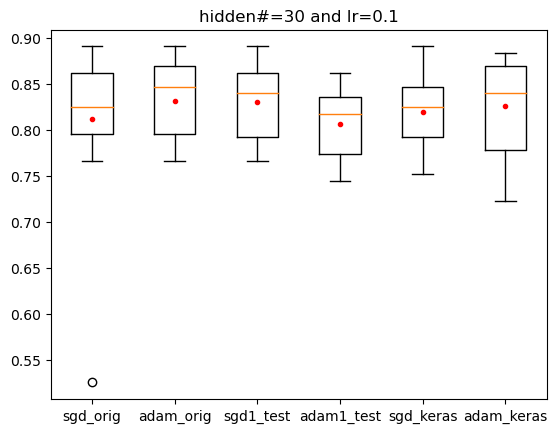

In [347]:
#plot results as boxplots with mean

import pylab as P
P.figure()
bp = P.boxplot((sgd_test, adam_test, sgd1_test, adam1_test, sgd_keras, adam_keras), labels=('sgd_orig',
                     'adam_orig', 'sgd1_test', 'adam1_test','sgd_keras', 'adam_keras'))
list = [np.mean(sgd_test), np.mean(adam_test), np.mean(sgd1_test),np.mean(adam1_test) ,np.mean(sgd_keras) ,np.mean(adam_keras)]
for i in range(0,6):
    P.plot(i+1,list[i], '.r')
P.title(f"hidden#={hidden1} and lr={learn_rate1}")

P.show()

In [266]:
import keras
x_train1, x_test1, y_train1, y_test1 = split(4)

In [297]:
#testing development of just one model
#not necessary
model_test = keras.Sequential()
model_test.add(keras.layers.Dense(hidden1, input_dim=10, activation='relu'))
# model_test.add(keras.layers.Dense(hidden1, input_dim=1, activation='relu'))
model_test.add(keras.layers.Dense(1, activation='sigmoid'))
sgd = keras.optimizers.SGD(learning_rate=learn_rate1)
model_test.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])
history = model_test.fit(x_train1, y_train1, epochs=150, batch_size=200, verbose=0, 
                    validation_data = (x_test1,y_test1), callbacks=[overfitCallback])
model_test.evaluate(x_test1,y_test1)


C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.7152 - loss: 0.6384 


[0.6384695768356323, 0.7080292105674744]

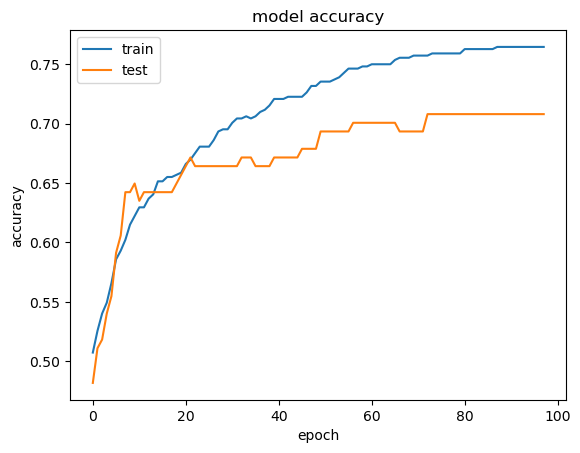

In [298]:
#plotting the accuracy performance of singular model
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

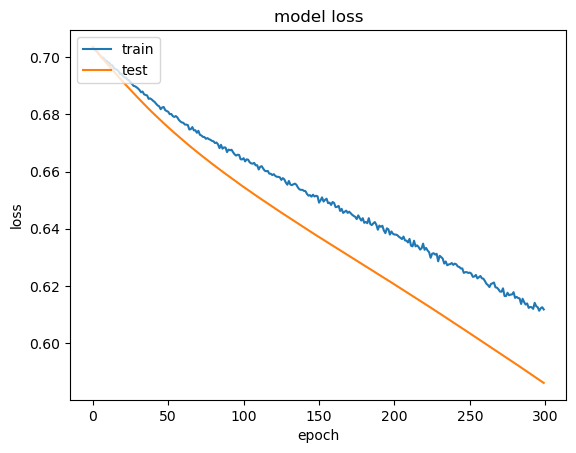

In [284]:
#loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [227]:
print('%.3f, %.3f, %.3f, %.3f, %.3f, %.3f' %(np.mean(sgd_test), np.mean(adam_test), np.mean(sgd1_test),np.mean(adam1_test) ,np.mean(accuracies) ,np.mean(accuracies1)))

0.812, 0.832, 0.835, 0.823, 0.805, 0.812


In [90]:
#creating model for actual predictions
x_train, x_test, y_train, y_test = split(7)
hidden = 5
learn_rate = 0.01
nn = MLPClassifier(hidden_layer_sizes=(hidden,), random_state=7, max_iter=10000,solver='adam', learning_rate_init=learn_rate)
nn.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(5,), learning_rate_init=0.01, max_iter=10000,
              random_state=7)

In [91]:
#creating our model for actual predictions
hidden1 = 30
learn_rate1 = 0.001
nn1 = MLPClassifier(hidden_layer_sizes=(hidden1,), random_state=7, max_iter=10000,solver='adam', learning_rate_init=learn_rate1)
nn1.fit(x_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(15,), max_iter=10000, random_state=7,
              solver='sgd')

In [92]:
#scoring the two models against eachother
score = nn.score(x_test, y_test) #original
score1 = nn1.score(x_test, y_test) #modified
print(score, score1)

0.8759124087591241 0.8613138686131386


In [93]:
#necessary for eval
m_0 = nn.coefs_[0]

In [102]:
m_0

array([[-1.03798063, -0.34123449,  0.64535806,  1.20465995,  1.05130962],
       [ 0.70060041,  0.6541948 , -0.74076768, -0.29469181,  0.03614581],
       [ 0.78192797,  0.92750421, -0.56193255, -1.08310091, -1.47922959],
       [ 0.51201064, -0.411221  ,  0.37736252,  1.29754942, -0.26646579],
       [ 0.424056  ,  0.85553166,  0.33573091,  0.98125485,  1.74967235],
       [-0.12964729,  0.07979097,  0.62699993,  0.42809381,  0.28716569],
       [ 0.35875335,  0.69856036, -1.43923717, -1.49441216, -1.82424225],
       [-0.30734095, -0.6053236 ,  1.0015772 ,  1.47348139,  0.57767266],
       [-0.29435347, -0.62140231,  0.42146152,  0.28949524,  0.17520969],
       [ 0.95003782,  0.55386309,  0.29745301, -0.7458365 , -0.10086692]])

In [77]:
# df_m_0 = pd.DataFrame(m_0,columns=["H1","H2","H3","H4","H5","H6","H7","H8","H9","H10","H11","H12","H13","H14","H15"],index = ["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10"])

In [78]:
# df_m_0 = pd.DataFrame(m_0,columns=["H1","H2","H3","H4","H5"],index = ["X1","X2","X3","X4","X5","X6","X7","X8","X9","X10"])

In [94]:
#necessary for eval
m_1 = nn.coefs_[1]

In [95]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
#take in data
elite_predict = pd.read_excel("./nn_predict_data.xlsx",sheet_name= 'elite',index_col= 0)

In [6]:
elite_predict

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Cluster10
elite,,,,,,,,,,
1-0-0,0.145833,0.122024,0.122024,0.122024,0.000000,0.122024,0.122024,0.000000,0.122024,0.122024
0-1-0,0.000000,0.122024,0.122024,0.122024,0.145833,0.122024,0.122024,0.000000,0.122024,0.122024
0-0-1,0.000000,0.122024,0.122024,0.122024,0.000000,0.122024,0.122024,0.145833,0.122024,0.122024
1-1-0,0.145833,0.101190,0.101190,0.101190,0.145833,0.101190,0.101190,0.000000,0.101190,0.101190
1-0-1,0.145833,0.101190,0.101190,0.101190,0.000000,0.101190,0.101190,0.145833,0.101190,0.101190
0_1_1,0.000000,0.101190,0.101190,0.101190,0.145833,0.101190,0.101190,0.145833,0.101190,0.101190
2_0_0,0.291667,0.101190,0.101190,0.101190,0.000000,0.101190,0.101190,0.000000,0.101190,0.101190
0_2_0,0.000000,0.101190,0.101190,0.101190,0.291667,0.101190,0.101190,0.000000,0.101190,0.101190
0_0_2,0.000000,0.101190,0.101190,0.101190,0.000000,0.101190,0.101190,0.291667,0.101190,0.101190


In [97]:
elite_predict_arr = elite_predict.to_numpy()

In [98]:
#applying model coefficients to the values
prob = sigmoid(np.matmul(sigmoid(np.matmul(elite_predict_arr,m_0)),m_1))

In [99]:
#create new column with prediction values
elite_predict["prob"] = prob

In [100]:
elite_predict

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Cluster10,prob
elite,,,,,,,,,,,
1-0-0,0.145833,0.122024,0.122024,0.122024,0.000000,0.122024,0.122024,0.000000,0.122024,0.122024,0.441419
0-1-0,0.000000,0.122024,0.122024,0.122024,0.145833,0.122024,0.122024,0.000000,0.122024,0.122024,0.406578
0-0-1,0.000000,0.122024,0.122024,0.122024,0.000000,0.122024,0.122024,0.145833,0.122024,0.122024,0.432769
1-1-0,0.145833,0.101190,0.101190,0.101190,0.145833,0.101190,0.101190,0.000000,0.101190,0.101190,0.476966
1-0-1,0.145833,0.101190,0.101190,0.101190,0.000000,0.101190,0.101190,0.145833,0.101190,0.101190,0.504107
0_1_1,0.000000,0.101190,0.101190,0.101190,0.145833,0.101190,0.101190,0.145833,0.101190,0.101190,0.468043
2_0_0,0.291667,0.101190,0.101190,0.101190,0.000000,0.101190,0.101190,0.000000,0.101190,0.101190,0.513205
0_2_0,0.000000,0.101190,0.101190,0.101190,0.291667,0.101190,0.101190,0.000000,0.101190,0.101190,0.441801
0_0_2,0.000000,0.101190,0.101190,0.101190,0.000000,0.101190,0.101190,0.291667,0.101190,0.101190,0.495069


In [9]:
#read in the others table
other_predict = pd.read_excel("./nn_predict_data.xlsx",sheet_name= 'other',index_col= 0)

In [10]:
other_predict

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Cluster10
other,,,,,,,,,,
2,0.145833,0.708333,0.000000,0.000000,0,0.000000,0.000000,0.145833,0.000000,0.000000
3,0.145833,0.000000,0.708333,0.000000,0,0.000000,0.000000,0.145833,0.000000,0.000000
4,0.145833,0.000000,0.000000,0.708333,0,0.000000,0.000000,0.145833,0.000000,0.000000
6,0.145833,0.000000,0.000000,0.000000,0,0.708333,0.000000,0.145833,0.000000,0.000000
7,0.145833,0.000000,0.000000,0.000000,0,0.000000,0.708333,0.145833,0.000000,0.000000
9,0.145833,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.145833,0.708333,0.000000
10,0.145833,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.145833,0.000000,0.708333


In [88]:
#same as with elite_predict
other_predict_arr = other_predict.to_numpy()
prob = sigmoid(np.matmul(sigmoid(np.matmul(other_predict_arr,m_0)),m_1))
other_predict["prob"] = prob

In [89]:
other_predict

,Cluster1,Cluster2,Cluster3,Cluster4,Cluster5,Cluster6,Cluster7,Cluster8,Cluster9,Cluster10,prob
other,,,,,,,,,,,
2,0.145833,0.708333,0.000000,0.000000,0,0.000000,0.000000,0.145833,0.000000,0.000000,0.457211
3,0.145833,0.000000,0.708333,0.000000,0,0.000000,0.000000,0.145833,0.000000,0.000000,0.321449
4,0.145833,0.000000,0.000000,0.708333,0,0.000000,0.000000,0.145833,0.000000,0.000000,0.627796
6,0.145833,0.000000,0.000000,0.000000,0,0.708333,0.000000,0.145833,0.000000,0.000000,0.661097
7,0.145833,0.000000,0.000000,0.000000,0,0.000000,0.708333,0.145833,0.000000,0.000000,0.301728
9,0.145833,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.145833,0.708333,0.000000,0.695589
10,0.145833,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.145833,0.000000,0.708333,0.464795
